In [88]:
%reload_ext autoreload
%autoreload 2

import dut_func as dut
import serial
import time
import struct
import numpy as np
# from bitarray import bitarray
from bitstring import BitArray
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']
import dut_a0 as a0

from misc import *

# dut.drv.serUSB = 'COM19'
drv = dut.drv

ser = serial.Serial('COM3', 9600, timeout=1)
dut.connect(ser)


dut.pads_defaults()

dut.ground_PIC()
dut.reset_chip()
dut.reset_dpe()

DAC initialized to a span from -10 V to 10 V


In [89]:
dut.power_on()

Setting vrefs to default


0->1->2->3->4->5->6->7->8->9->10->11->

(0.4, 4.1)

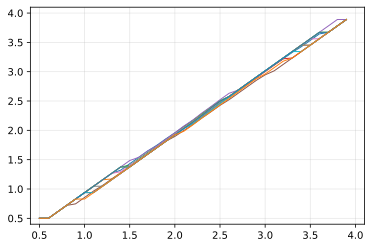

In [90]:
volt_in = np.arange(0.5, 4.0, 0.1)
volt_out_list = []
adc_raw=[]
for addr_fifo in range(12):
    print(addr_fifo, end='->')
    data = dut.calibrate_adc(volt_in, addr_fifo=addr_fifo )
    volt_out_list.append( [dut.adc2volt(d) for d in data] )
    adc_raw.append(data)
    
plt.grid(True, alpha=0.3)
for volt_out in volt_out_list:
#     plt.plot(volt_in, [v+3.3-0.5 for v in volt_out], linewidth=1)
    plt.plot(volt_in, volt_out, linewidth=1)
plt.ylim(0.4,4.1)
plt.xlim(0.4,4.1)

In [91]:
dut.disconnect()

In [95]:
from dpe import DPE
dpe = DPE('COM3')
dpe.set_clock(5)

DAC initialized to a span from -10 V to 10 V
Setting vrefs to default
Setting ADC_CK freq=5000.0kHz
Setting CK_ARRAY freq=5000.0kHz


0.2669868469238281
0.27201199531555176
0.26702070236206055
0.26502299308776855
0.27002429962158203
0.26702308654785156
0.26200056076049805
0.2579765319824219
0.26901769638061523
0.2630195617675781
0.2680237293243408
0.2730228900909424


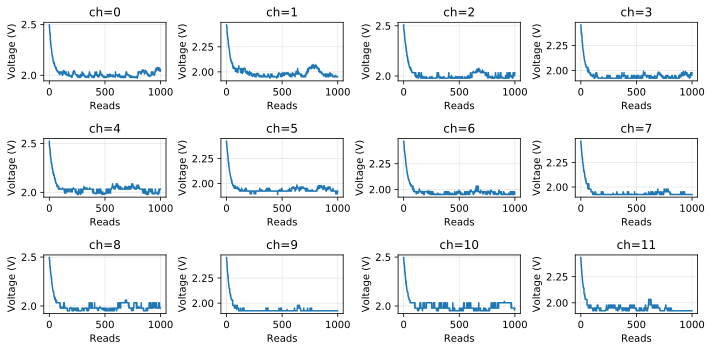

In [99]:
ch = 0

plt.figure(figsize=(10,5))
for ch in range(12):
    with serial.Serial(dpe.ser_name, 9600, timeout=1) as ser:
        dpe.a0.dut.connect(ser)
        a0 = dpe.a0
        dut = a0.dut
        drv = a0.drv

        dut.dac_set('P_ADC_EXT_TEST_IN', 2.5)

        volt = []
        ts = time.time()
        for _ in range(1000):
            drv.ser.write(f'412,{ch},\0'.encode())

            value = drv.ser.read(2)
            value = struct.unpack('<H', value)[0]
            volt.append(dut.adc2volt(value))

#             time.sleep(5e-3)
        print(time.time()-ts)

    volt = np.array(volt)


    plt.subplot(3,4,ch+1)
    plt.plot(volt)
    plt.ylabel('Voltage (V)')
    plt.xlabel('Reads')
    plt.grid(True, alpha=.3)
    plt.title(f'ch={ch}')
    
plt.tight_layout()

0.25902366638183594
0.2680342197418213
0.26902174949645996
0.26302266120910645
0.2750241756439209
0.28202223777770996
0.2790191173553467
0.2710092067718506


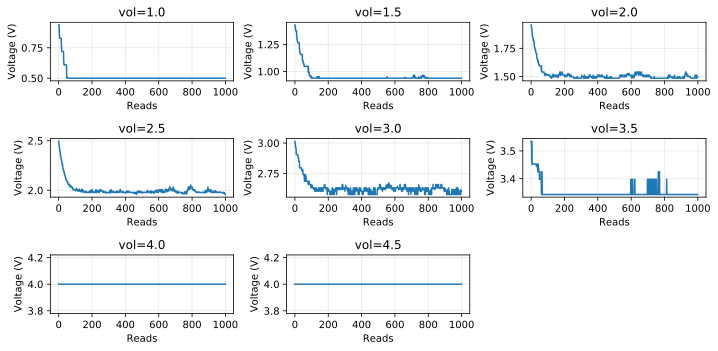

In [102]:
ch = 0

plt.figure(figsize=(10,5))

i = 0
for vol in np.arange(1.0,4.6, 0.5):
    i +=1
    with serial.Serial(dpe.ser_name, 9600, timeout=1) as ser:
        dpe.a0.dut.connect(ser)
        a0 = dpe.a0
        dut = a0.dut
        drv = a0.drv

        dut.dac_set('P_ADC_EXT_TEST_IN', vol)

        volt = []
        ts = time.time()
        for _ in range(1000):
            drv.ser.write(f'412,{ch},\0'.encode())

            value = drv.ser.read(2)
            value = struct.unpack('<H', value)[0]
            volt.append(dut.adc2volt(value))

#             time.sleep(5e-3)
        print(time.time()-ts)

    volt = np.array(volt)


    plt.subplot(3,3,i)
    plt.plot(volt)
    plt.ylabel('Voltage (V)')
    plt.xlabel('Reads')
    plt.grid(True, alpha=.3)
    plt.title(f'vol={vol}')
    
plt.tight_layout()

Setting ADC_CK freq=1000.0kHz
Setting CK_ARRAY freq=1000.0kHz
0.3860328197479248
Setting ADC_CK freq=1000.0kHz
Setting CK_ARRAY freq=1000.0kHz
1.5681638717651367
Setting ADC_CK freq=1000.0kHz
Setting CK_ARRAY freq=1000.0kHz
3.5293378829956055
Setting ADC_CK freq=1000.0kHz
Setting CK_ARRAY freq=1000.0kHz
10.472917795181274


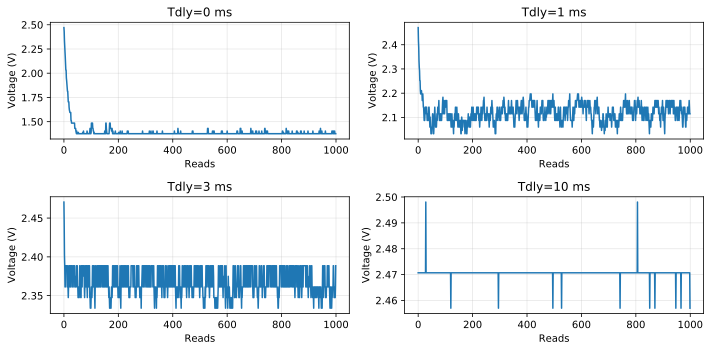

In [114]:
ch = 0

plt.figure(figsize=(10,5))

i = 0
for Tdly in [0, 1, 3, 10]:
    i +=1
    dpe.set_clock(1)

    with serial.Serial(dpe.ser_name, 9600, timeout=1) as ser:
        dpe.a0.dut.connect(ser)
        a0 = dpe.a0
        dut = a0.dut
        drv = a0.drv

        dut.dac_set('P_ADC_EXT_TEST_IN', 2.5)

        volt = []
        ts = time.time()
        for _ in range(1000):
            drv.ser.write(f'412,{ch},\0'.encode())

            value = drv.ser.read(2)
            value = struct.unpack('<H', value)[0]
            volt.append(dut.adc2volt(value))

            if Tdly !=0 :
                time.sleep(Tdly * 1e-3)
        print(time.time()-ts)

    volt = np.array(volt)

    plt.subplot(2, 2, i)
    plt.plot(volt)
    plt.ylabel('Voltage (V)')
    plt.xlabel('Reads')
    plt.grid(True, alpha=.3)
    plt.title(f'Tdly={Tdly} ms')
#     plt.ylim(0.4, 2.6)
    
plt.tight_layout()

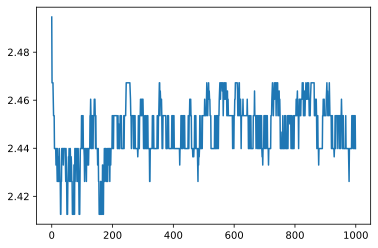

In [14]:
dac_set('P_ADC_EXT_TEST_IN', V_adc)

NameError: name 'dac_set' is not defined

In [ ]:
ar=0
r=11
c=17

Tsh_list = np.arange(0, 255, 5)
Vgate = 5
Vread = 0.03

Vreads = np.arange(1000)

gain = -1

with serial.Serial(dpe.ser_name, 9600, timeout=1) as ser:
    dpe.a0.dut.connect(ser)

    currs = []
    
    #_ = dpe.a0.pic_read_config(Vread=Vread, Vgate=Vgate, gain=-1)
    a = dpe.a0.pic_read_single(Vread=Vread, Vgate=Vgate, array=ar, row=r, 
                                                   col=c, gain=gain, skip_conf=False) 
    ts = time.time()
    for Vr in Vreads:
#         dpe.a0.pic_read_config(Vread=Vread, Vgate=Vgate, gain=gain)
        currs.append( dpe.a0.pic_read_single_test(Vread=Vread, Vgate=Vgate, array=ar, row=r, 
                                                  col=c, gain=gain, skip_conf=True, T1=0, T2=0, T3=0, Nt=0) )
#          currs.append( dpe.a0.pic_read_single(Vread=Vread, Vgate=Vgate, array=ar, row=r, 
#                                                    col=c, gain=gain, skip_conf=False) )
#         time.sleep(10e-3)
    print(time.time()-ts)
plt.figure(figsize=(4,3))

plt.plot(Vreads, [i* 1e6 for i in currs], '.-')
    
plt.ylabel('Current (uA)')
plt.xlabel('Reads')
plt.grid(True, alpha=0.3)

# plt.ylim(7.5, 8.5)